In [1]:
# behavioral results

In [2]:
from os import path
from gradecc.utils.filenames import data_outside

import pandas as pd

dfb = pd.read_csv(path.join(data_outside, 'RL_behavior.csv'))

In [3]:
dfb

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True
...,...,...,...,...,...,...,...
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True
12168,ZN1,2,200,72.0,0.269800,0.162063,True


In [4]:
dfb.Subject.nunique()

45

In [5]:
sbehav = dfb.Subject.unique()

In [3]:
from gradecc.utils.filenames import subjects_filename

subjects_match = pd.read_csv(subjects_filename, delimiter='\t')
subjects_match
# exclude right here. remove column

,participant_id,dicom_dir,exclude
0,1,AB1,0
1,2,AG1,0
2,3,AH1,0
3,4,AM1,0
4,5,AN1,1
5,6,AP1,0
6,7,AV1,0
7,8,BN1,0
8,9,CD1,0
9,10,CG1,0


In [104]:
subjects_match[subjects_match.exclude == False]

,participant_id,dicom_dir,exclude
0,1,AB1,0
1,2,AG1,0
2,3,AH1,0
3,4,AM1,0
5,6,AP1,0
6,7,AV1,0
7,8,BN1,0
8,9,CD1,0
9,10,CG1,0
10,11,CH1,0


In [7]:
set(subjects_match.dicom_dir) - set(sbehav)

{'RG1'}

In [8]:
dfb.Block.nunique()

2

In [9]:
dfb.Trial.max()

201

<AxesSubplot:xlabel='ReactionTime', ylabel='Count'>

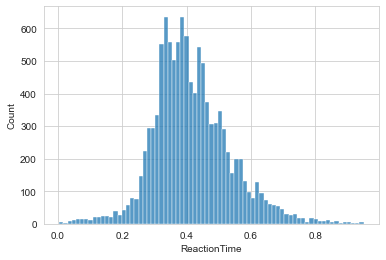

In [10]:
import seaborn as sns

sns.histplot(data=dfb, x='ReactionTime')

<AxesSubplot:xlabel='MovementTime', ylabel='Count'>

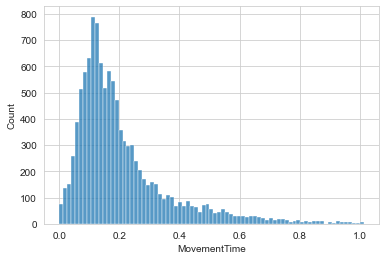

In [11]:
sns.histplot(data=dfb, x='MovementTime')

In [12]:
dfbl = dfb[dfb.Block == 2]

In [13]:
dfb[dfb.Block == 1]

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True
...,...,...,...,...,...,...,...
11965,ZN1,1,66,0.0,0.335081,0.228871,True
11966,ZN1,1,67,0.0,0.354001,0.242783,True
11967,ZN1,1,68,2.0,0.245604,0.319783,True
11968,ZN1,1,69,0.0,0.387149,0.342233,True


<AxesSubplot:xlabel='Score', ylabel='Count'>

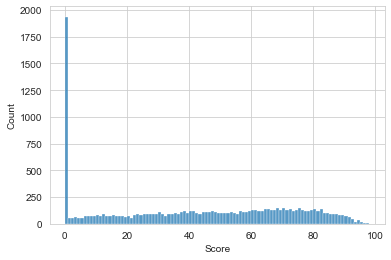

In [14]:
sns.histplot(data=dfb, x='Score', binwidth=1)

<AxesSubplot:xlabel='Score', ylabel='Count'>

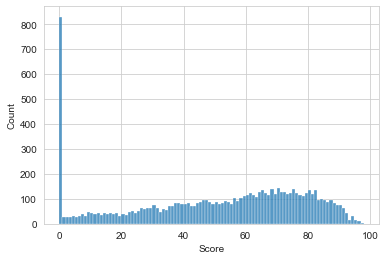

In [15]:
sns.histplot(data=dfbl, x='Score', binwidth=1)

<AxesSubplot:xlabel='Score', ylabel='count'>

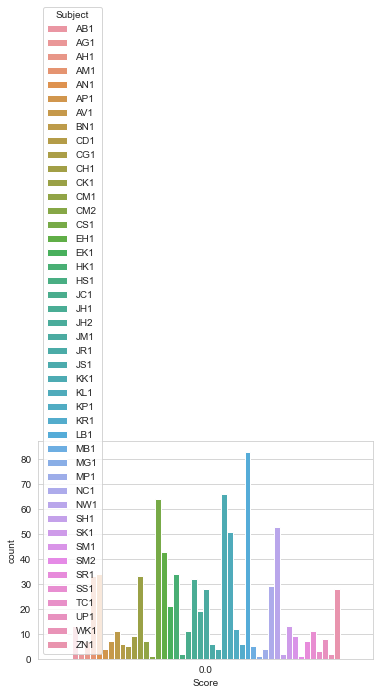

In [16]:
sns.countplot(data=dfbl[dfbl.Score==0], x='Score', hue='Subject')

In [17]:
dfbl[dfbl.Score == 0].groupby('Subject').Score.count()

Subject
AB1    13
AG1     2
AH1     7
AM1    33
AN1    34
AP1     4
AV1     7
BN1    11
CD1     6
CG1     5
CH1     9
CK1    33
CM1     7
CM2     1
CS1    64
EH1    43
EK1    21
HK1    34
HS1     2
JC1    11
JH1    32
JH2    19
JM1    28
JR1     6
JS1     4
KK1    66
KL1    51
KP1    12
KR1     6
LB1    83
MB1     5
MG1     1
MP1     4
NC1    29
NW1    53
SH1     2
SK1    13
SM1     9
SM2     1
SR1     7
SS1    11
TC1     3
UP1     8
WK1     2
ZN1    28
Name: Score, dtype: int64

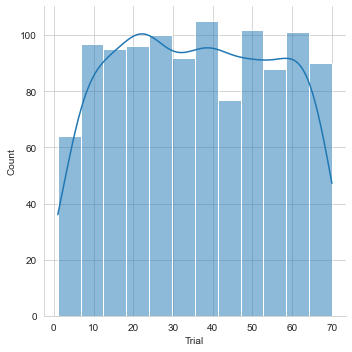

In [18]:
sns.displot(dfb.loc[(dfb.Score == 0) & (dfb.Block == 1)], x='Trial', kde=True)

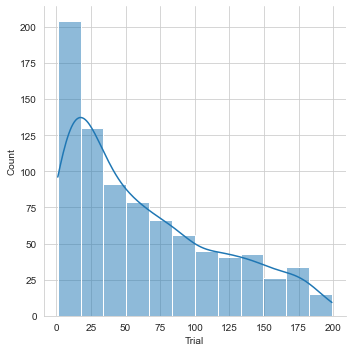

In [19]:
sns.displot(dfb.loc[(dfb.Score == 0) & (dfb.Block == 2)], x='Trial', kde=True)

/Users/qasem/opt/anaconda3/envs/brainv/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/qasem/opt/anaconda3/envs/brainv/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/qasem/opt/anaconda3/envs/brainv/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


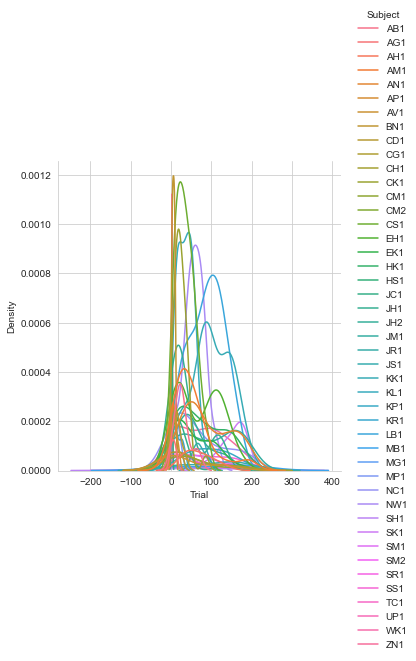

In [20]:
sns.displot(dfbl.loc[dfbl.Score == 0], x='Trial', hue='Subject', kind='kde')

In [21]:
dfb.Score.astype(str).describe()

count     12170
unique      100
top         0.0
freq       1937
Name: Score, dtype: object

In [22]:
# is this the best measure?
# todo get path trace to try others

In [23]:
dfb.Valid.describe()

count     12170
unique        2
top        True
freq      11153
Name: Valid, dtype: object

<AxesSubplot:xlabel='Valid', ylabel='count'>

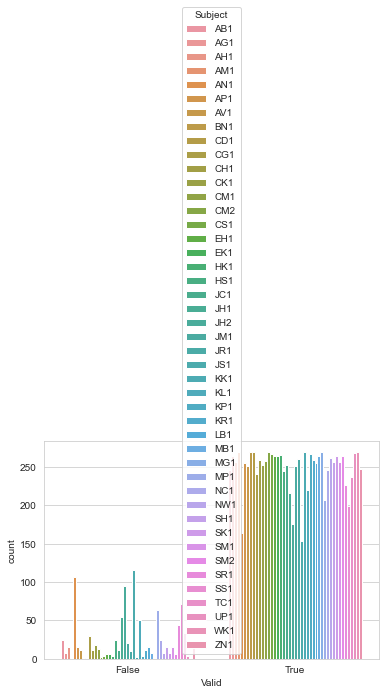

In [24]:
sns.countplot(data=dfb, x='Valid', hue='Subject')

In [25]:
dfb.groupby('Subject').Valid.count()

Subject
AB1    271
AG1    271
AH1    271
AM1    271
AN1    270
AP1    271
AV1    262
BN1    271
CD1    271
CG1    271
CH1    271
CK1    271
CM1    271
CM2    271
CS1    271
EH1    271
EK1    271
HK1    270
HS1    269
JC1    265
JH1    270
JH2    271
JM1    271
JR1    271
JS1    270
KK1    271
KL1    271
KP1    271
KR1    271
LB1    271
MB1    271
MG1    271
MP1    271
NC1    270
NW1    269
SH1    271
SK1    271
SM1    271
SM2    271
SR1    271
SS1    271
TC1    271
UP1    271
WK1    271
ZN1    270
Name: Valid, dtype: int64

In [26]:
# J's comments
# try removing zeros
# how they're distributed through time. and for subjects

<AxesSubplot:xlabel='Valid', ylabel='count'>

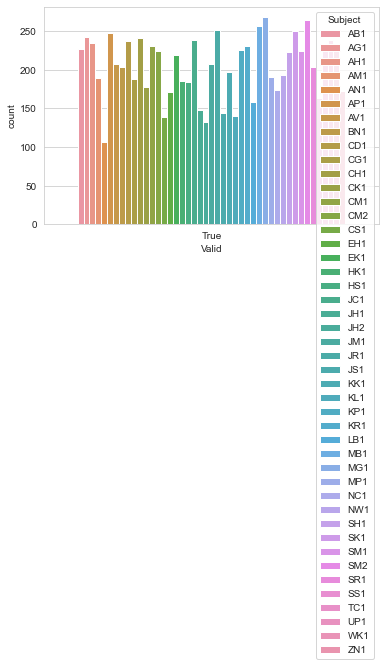

In [27]:
sns.countplot(data=dfb[dfb.Score > 0], x='Valid', hue='Subject')

In [28]:
dfb = dfb[dfb.Score > 0]

<AxesSubplot:xlabel='Trial', ylabel='Score'>

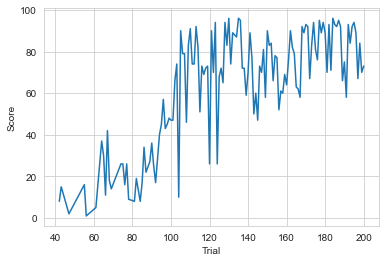

In [29]:
sns.lineplot(data=dfb[(dfb.Subject == 'CS1') & (dfb.Block == 2)],
             x='Trial', y='Score')

In [30]:
dfb = dfb[dfb.Subject != 'CS1']

In [31]:
dfb.Block.astype(str).describe()

count     9077
unique       2
top          2
freq      7288
Name: Block, dtype: object

In [32]:
dfb[dfb.Block == 1].Trial.max()

70

In [33]:
dfb[dfb.Block == 2].Trial.max()

200

In [34]:
# block 1 is baseline
# block 2 is learning

In [35]:
dfb

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
4,AB1,1,5,34.0,0.588884,0.211777,True
6,AB1,1,7,33.0,0.619166,0.292559,True
...,...,...,...,...,...,...,...
12164,ZN1,2,196,61.0,0.315040,0.162585,True
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True


In [36]:
dfb.Subject.unique()

array(['AB1', 'AG1', 'AH1', 'AM1', 'AN1', 'AP1', 'AV1', 'BN1', 'CD1',
       'CG1', 'CH1', 'CK1', 'CM1', 'CM2', 'EH1', 'EK1', 'HK1', 'HS1',
       'JC1', 'JH1', 'JH2', 'JM1', 'JR1', 'JS1', 'KK1', 'KL1', 'KP1',
       'KR1', 'LB1', 'MB1', 'MG1', 'MP1', 'NC1', 'NW1', 'SH1', 'SK1',
       'SM1', 'SM2', 'SR1', 'SS1', 'TC1', 'UP1', 'WK1', 'ZN1'],
      dtype=object)

<AxesSubplot:>

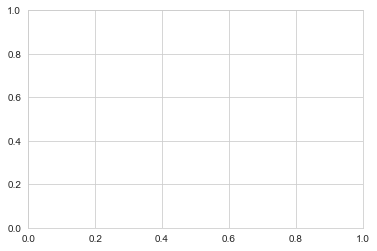

In [37]:
sns.lineplot(data=dfb[(dfb.Subject == 'CS1') & (dfb.Block == 2)],
             x='Trial', y='Score')

<AxesSubplot:xlabel='Trial', ylabel='Score'>

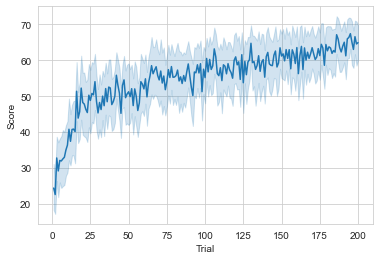

In [38]:
sns.lineplot(data=dfb[dfb.Block == 2], x='Trial', y='Score')

In [39]:
# maybe cluster subjects here
# eg, based on average of last trials

In [40]:
dfb[dfb.Block == 2]

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
70,AB1,2,1,37.0,0.668224,0.322474,True
71,AB1,2,2,11.0,0.505785,0.193614,True
73,AB1,2,4,1.0,0.535999,0.153406,True
74,AB1,2,5,12.0,0.450949,0.096948,True
76,AB1,2,7,11.0,0.467101,0.080247,True
...,...,...,...,...,...,...,...
12164,ZN1,2,196,61.0,0.315040,0.162585,True
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True


<AxesSubplot:xlabel='Subject', ylabel='Score'>

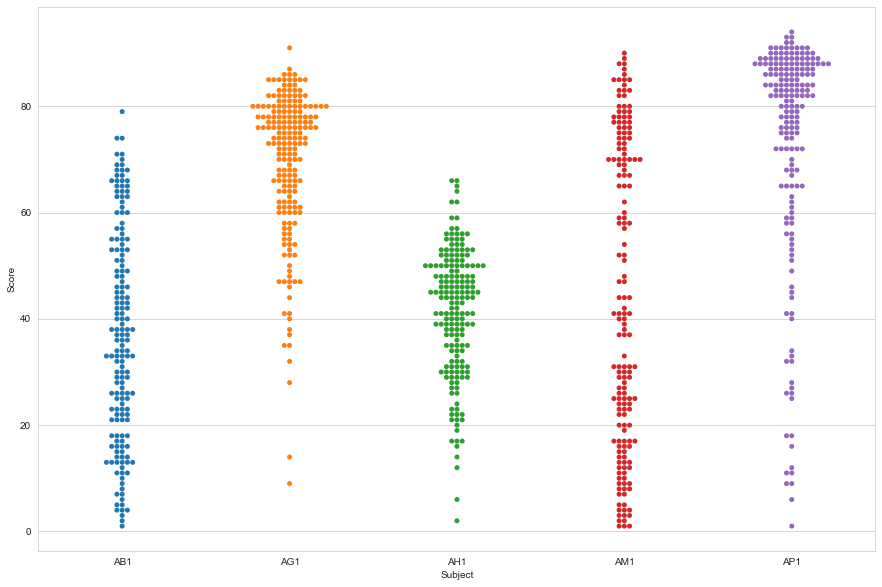

In [41]:
subjects_sublist = ['AB1', 'AG1', 'AH1', 'AM1', 'AP1']

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))

sns.swarmplot(data=dfb[(dfb.Block == 2)
                       & (dfb.Subject.isin(subjects_sublist))
],
             x='Subject', y='Score',
              ax=ax)

In [42]:
# todo learn what to do with many params

def subject_avg_score(df, window='first', metric='Score', rename=None,
                      score_window=40, block=2, agg='mean'):
    if window == 'first':
        sub_window = df.Trial <= score_window
    elif window == 'last':
        max_ = df[df.Block == block].Trial.max()
        sub_window = df.Trial >= max_ - score_window
    if rename is None:
        rename = metric + '_' + agg + '_' + window + str(score_window)

    return df[(df.Block == block) & sub_window] \
        .groupby('Subject')[metric].agg(agg)\
        .rename(rename)

In [43]:
subject_avg_score(dfb, score_window=40, block=2, agg='median',
                  window='last')

Subject
AB1    47.0
AG1    73.5
AH1    48.0
AM1    75.0
AN1    40.0
AP1    86.0
AV1    64.5
BN1    82.0
CD1    59.0
CG1    59.0
CH1    47.0
CK1    81.0
CM1    64.0
CM2    79.0
EH1    36.0
EK1    59.0
HK1    46.0
HS1    76.0
JC1    60.0
JH1    74.0
JH2    79.0
JM1    60.5
JR1    64.0
JS1    36.0
KK1    27.5
KL1    60.0
KP1    85.0
KR1    82.0
LB1    56.5
MB1    60.0
MG1    89.0
MP1    67.0
NC1    67.0
NW1    55.0
SH1    65.0
SK1    62.0
SM1    55.0
SM2    79.0
SR1    47.0
SS1    43.0
TC1    77.5
UP1    73.5
WK1    82.0
ZN1    61.0
Name: Score_median_last40, dtype: float64

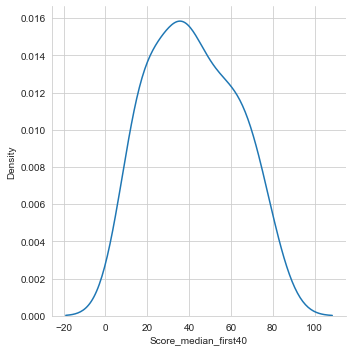

In [44]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='median')
sns.displot(subj_init_score, kind='kde')

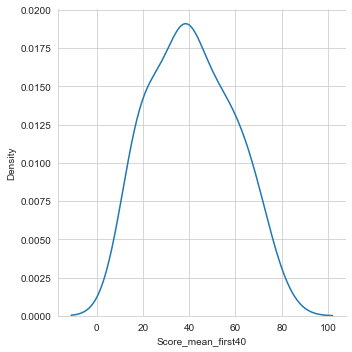

In [45]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='mean')
sns.displot(subj_init_score, kind='kde')

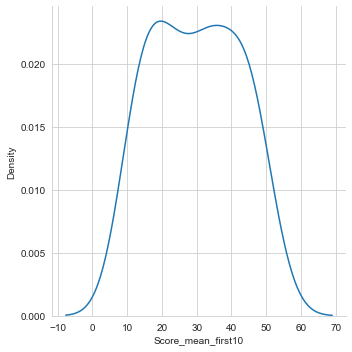

In [46]:
subj_init_score = subject_avg_score(dfb, score_window=10, block=2, agg='mean')
sns.displot(subj_init_score, kind='kde')

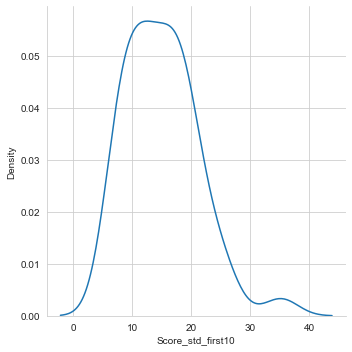

In [47]:
subj_init_score = subject_avg_score(dfb, score_window=10, block=2, agg='std')
sns.displot(subj_init_score, kind='kde')

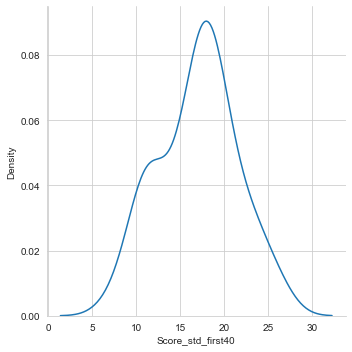

In [48]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='std')
sns.displot(subj_init_score, kind='kde')

In [49]:
# define metrics

In [50]:
metrics = pd.concat(
    [
        subject_avg_score(dfb, score_window=20, agg='median', window='first'),
        subject_avg_score(dfb, score_window=20, agg='median', window='last'),
        subject_avg_score(dfb, score_window=20, agg='mean', window='first'),
        subject_avg_score(dfb, score_window=20, agg='mean', window='last'),
        # subject_avg_score(dfb, score_window=40, agg='mean', window='first'),
        # subject_avg_score(dfb, score_window=40, agg='mean', window='last'),
        subject_avg_score(dfb, score_window=20, agg='std', window='first'),
        subject_avg_score(dfb, score_window=20, agg='std', window='last'),
        subject_avg_score(dfb, score_window=70, agg='std', window='first',
                          block=1, rename='Score_std_baseline'),
    ],
    axis=1, join="outer", ignore_index=False,
)

In [51]:
metrics['Score_median_diff20'] = metrics['Score_median_last20'] - metrics['Score_median_first20']
metrics['Score_mean_diff20'] = metrics['Score_mean_last20'] - metrics['Score_mean_first20']
# metrics['Score_diff40'] = metrics['Score_mean_last40'] - metrics['Score_mean_first40']
metrics

,Score_median_first20,Score_median_last20,Score_mean_first20,Score_mean_last20,Score_std_first20,Score_std_last20,Score_std_baseline,Score_median_diff20,Score_mean_diff20
Subject,,,,,,,,,
AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
AG1,47.0,70.0,43.588235,70.238095,11.613886,10.246486,12.044398,23.0,26.649860
AH1,41.5,48.0,40.222222,47.722222,13.117369,4.226047,15.814335,6.5,7.500000
AM1,27.0,75.0,25.230769,74.368421,19.421439,12.499825,20.446742,48.0,49.137652
AN1,41.5,55.0,44.666667,45.857143,23.243116,25.458650,24.135727,13.5,1.190476
AP1,17.0,85.0,22.062500,84.380952,16.854154,4.609514,10.085762,68.0,62.318452
AV1,48.5,62.0,49.428571,63.050000,20.727961,7.444355,19.063144,13.5,13.621429
BN1,75.0,84.0,69.555556,83.142857,15.525069,5.092011,14.871796,9.0,13.587302
CD1,15.0,62.0,16.266667,58.285714,10.443499,15.106763,11.108396,47.0,42.019048


In [52]:
# sns.distplot(metrics.Score_std_first20, hist=False)
# sns.distplot(metrics.Score_std_last20, hist=False)

In [53]:
# sns.distplot(metrics.Score_mean_first20, hist=False)
# sns.distplot(metrics.Score_mean_last20, hist=False)

In [54]:
# sns.distplot(metrics.Score_diff20, hist=False)
# sns.distplot(metrics.Score_diff40, hist=False) # in orange
# should get towards zero with larger window size

In [55]:
# they were metrics. Now, measures as features.

In [56]:
from gradecc.compute.measures import get_measures

# merged with subject (str)
dfm = get_measures()
dfm = dfm.merge(subjects_match, left_on='subject', right_on='participant_id')
dfm = dfm[dfm.exclude == 0]
dfm

Reading data from /Users/qasem/PycharmProjects/gradients-rl-task/data/cache/measures.csv


,value,region,subject,epoch,measure,participant_id,dicom_dir,exclude
0,0.515067,7Networks_LH_Vis_1,1,baseline,gradient1,1,AB1,0
1,0.829542,7Networks_LH_Vis_2,1,baseline,gradient1,1,AB1,0
2,0.537888,7Networks_LH_Vis_3,1,baseline,gradient1,1,AB1,0
3,-0.432275,7Networks_LH_Vis_4,1,baseline,gradient1,1,AB1,0
4,0.644839,7Networks_LH_Vis_5,1,baseline,gradient1,1,AB1,0
...,...,...,...,...,...,...,...,...
592795,1.528952,Vermis VI,46,late,eccentricity,46,ZN1,0
592796,1.148793,Vermis VIIIa,46,late,eccentricity,46,ZN1,0
592797,0.494938,Vermis VIIIb,46,late,eccentricity,46,ZN1,0
592798,0.828814,Vermis VIIb,46,late,eccentricity,46,ZN1,0


In [57]:
# add values for
# baseline to early
# early to late

In [58]:
dfm

,value,region,subject,epoch,measure,participant_id,dicom_dir,exclude
0,0.515067,7Networks_LH_Vis_1,1,baseline,gradient1,1,AB1,0
1,0.829542,7Networks_LH_Vis_2,1,baseline,gradient1,1,AB1,0
2,0.537888,7Networks_LH_Vis_3,1,baseline,gradient1,1,AB1,0
3,-0.432275,7Networks_LH_Vis_4,1,baseline,gradient1,1,AB1,0
4,0.644839,7Networks_LH_Vis_5,1,baseline,gradient1,1,AB1,0
...,...,...,...,...,...,...,...,...
592795,1.528952,Vermis VI,46,late,eccentricity,46,ZN1,0
592796,1.148793,Vermis VIIIa,46,late,eccentricity,46,ZN1,0
592797,0.494938,Vermis VIIIb,46,late,eccentricity,46,ZN1,0
592798,0.828814,Vermis VIIb,46,late,eccentricity,46,ZN1,0


In [59]:
dfm_diff = dfm[dfm.measure == 'eccentricity'].pivot(columns='epoch', values='value', index=['region', 'measure', 'dicom_dir']).reset_index()
dfm_diff['b2e'] = dfm_diff['early'] - dfm_diff['baseline']
dfm_diff['e2l'] = dfm_diff['late'] - dfm_diff['early']
dfm_diff

epoch,region,measure,dicom_dir,baseline,early,late,b2e,e2l
0,7Networks_LH_Cont_Cing_1,eccentricity,AB1,1.047430,1.750906,0.957023,0.703477,-0.793883
1,7Networks_LH_Cont_Cing_1,eccentricity,AG1,2.374352,2.731942,1.421168,0.357591,-1.310775
2,7Networks_LH_Cont_Cing_1,eccentricity,AH1,1.632878,1.618233,0.852479,-0.014645,-0.765754
3,7Networks_LH_Cont_Cing_1,eccentricity,AM1,1.681255,2.045081,1.621641,0.363827,-0.423440
4,7Networks_LH_Cont_Cing_1,eccentricity,AP1,0.720496,1.964128,0.590842,1.243632,-1.373286
...,...,...,...,...,...,...,...,...
39515,Vermis X,eccentricity,SM2,0.795794,0.728147,0.665553,-0.067648,-0.062593
39516,Vermis X,eccentricity,SR1,0.809606,0.328200,0.871189,-0.481406,0.542988
39517,Vermis X,eccentricity,UP1,0.459432,0.798118,0.483595,0.338686,-0.314523
39518,Vermis X,eccentricity,WK1,0.772721,0.740228,0.436073,-0.032493,-0.304156


In [60]:
39520 * 5 * 3 == 592800

True

In [61]:
value = 'value'
dfm_diff = pd.melt(dfm_diff.reset_index(),
                 id_vars=['region', 'dicom_dir', 'measure'],
                 value_vars=['baseline', 'early', 'late', 'b2e', 'e2l'],
                 var_name='epoch_', value_name=value)
dfm_diff

,region,dicom_dir,measure,epoch_,value
0,7Networks_LH_Cont_Cing_1,AB1,eccentricity,baseline,1.047430
1,7Networks_LH_Cont_Cing_1,AG1,eccentricity,baseline,2.374352
2,7Networks_LH_Cont_Cing_1,AH1,eccentricity,baseline,1.632878
3,7Networks_LH_Cont_Cing_1,AM1,eccentricity,baseline,1.681255
4,7Networks_LH_Cont_Cing_1,AP1,eccentricity,baseline,0.720496
...,...,...,...,...,...
197595,Vermis X,SM2,eccentricity,e2l,-0.062593
197596,Vermis X,SR1,eccentricity,e2l,0.542988
197597,Vermis X,UP1,eccentricity,e2l,-0.314523
197598,Vermis X,WK1,eccentricity,e2l,-0.304156


In [62]:
592800 * (1 + .2 * 5/3) == 790400

True

In [63]:
# its only ecc

In [64]:
dfm_ = dfm.rename(columns={'epoch': 'epoch_'})[dfm_diff.columns]
dfm_ = pd.concat([dfm_, dfm_diff], axis=0)
dfm_

,region,dicom_dir,measure,epoch_,value
0,7Networks_LH_Vis_1,AB1,gradient1,baseline,0.515067
1,7Networks_LH_Vis_2,AB1,gradient1,baseline,0.829542
2,7Networks_LH_Vis_3,AB1,gradient1,baseline,0.537888
3,7Networks_LH_Vis_4,AB1,gradient1,baseline,-0.432275
4,7Networks_LH_Vis_5,AB1,gradient1,baseline,0.644839
...,...,...,...,...,...
197595,Vermis X,SM2,eccentricity,e2l,-0.062593
197596,Vermis X,SR1,eccentricity,e2l,0.542988
197597,Vermis X,UP1,eccentricity,e2l,-0.314523
197598,Vermis X,WK1,eccentricity,e2l,-0.304156


In [65]:
# for example,

In [66]:
d_pfc19 = dfm[(dfm.region == '7Networks_LH_Default_PFC_19') &
    (dfm.epoch == 'early') & (dfm.measure == 'eccentricity')
]
d_pfc19 = d_pfc19.drop(['participant_id', 'exclude'], axis=1)
# get rid of exclude earlier
d_pfc19

,value,region,subject,epoch,measure,dicom_dir
13587,3.487743,7Networks_LH_Default_PFC_19,1,early,eccentricity,AB1
29187,3.424829,7Networks_LH_Default_PFC_19,2,early,eccentricity,AG1
44787,1.538534,7Networks_LH_Default_PFC_19,3,early,eccentricity,AH1
60387,4.102743,7Networks_LH_Default_PFC_19,4,early,eccentricity,AM1
75987,3.645133,7Networks_LH_Default_PFC_19,6,early,eccentricity,AP1
91587,3.427919,7Networks_LH_Default_PFC_19,7,early,eccentricity,AV1
107187,3.555991,7Networks_LH_Default_PFC_19,8,early,eccentricity,BN1
122787,2.758968,7Networks_LH_Default_PFC_19,9,early,eccentricity,CD1
138387,3.156659,7Networks_LH_Default_PFC_19,10,early,eccentricity,CG1
153987,3.108713,7Networks_LH_Default_PFC_19,11,early,eccentricity,CH1


In [67]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='mean')
subj_init_score

Subject
AB1    17.423077
AG1    55.702703
AH1    38.114286
AM1    24.826087
AN1    41.238095
AP1    40.200000
AV1    56.441176
BN1    77.344828
CD1    21.147059
CG1    33.074074
CH1    43.312500
CK1    13.700000
CM1    31.970588
CM2    69.615385
EH1    18.571429
EK1    21.233333
HK1    30.111111
HS1    68.351351
JC1    40.241379
JH1    34.307692
JH2    23.941176
JM1    36.937500
JR1    35.763158
JS1    50.272727
KK1    16.933333
KL1    13.600000
KP1    39.054054
KR1    38.310345
LB1    16.523810
MB1    49.500000
MG1    65.410256
MP1    51.281250
NC1    55.629630
NW1    26.185185
SH1    64.846154
SK1    39.205128
SM1    56.314286
SM2    59.641026
SR1    21.161290
SS1    40.000000
TC1    62.970588
UP1    46.857143
WK1    69.473684
ZN1    52.769231
Name: Score_mean_first40, dtype: float64

In [68]:
# x = d_pfc19.set_index('dicom_dir').value.rename('feature')
x = d_pfc19

dd = x.merge(subj_init_score.reset_index(),
           how='inner', left_on='dicom_dir', right_on='Subject')
dd

,value,region,subject,epoch,measure,dicom_dir,Subject,Score_mean_first40
0,3.487743,7Networks_LH_Default_PFC_19,1,early,eccentricity,AB1,AB1,17.423077
1,3.424829,7Networks_LH_Default_PFC_19,2,early,eccentricity,AG1,AG1,55.702703
2,1.538534,7Networks_LH_Default_PFC_19,3,early,eccentricity,AH1,AH1,38.114286
3,4.102743,7Networks_LH_Default_PFC_19,4,early,eccentricity,AM1,AM1,24.826087
4,3.645133,7Networks_LH_Default_PFC_19,6,early,eccentricity,AP1,AP1,40.200000
5,3.427919,7Networks_LH_Default_PFC_19,7,early,eccentricity,AV1,AV1,56.441176
6,3.555991,7Networks_LH_Default_PFC_19,8,early,eccentricity,BN1,BN1,77.344828
7,2.758968,7Networks_LH_Default_PFC_19,9,early,eccentricity,CD1,CD1,21.147059
8,3.156659,7Networks_LH_Default_PFC_19,10,early,eccentricity,CG1,CG1,33.074074
9,3.108713,7Networks_LH_Default_PFC_19,11,early,eccentricity,CH1,CH1,43.312500


<AxesSubplot:xlabel='value', ylabel='Score_mean_first40'>

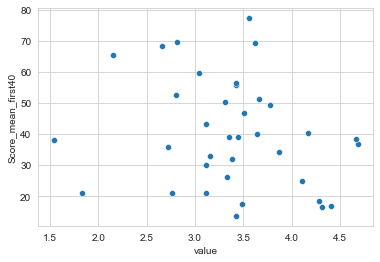

In [69]:
sns.scatterplot(data=dd, x='value', y='Score_mean_first40')

In [70]:
from scipy.stats import pearsonr

pearsonr(x=dd['value'], y=dd['Score_mean_first40'])

(-0.2148348554686503, 0.2082936379432745)

In [71]:
def corr(data, x, y):
    return pearsonr(data[x], data[y])

In [72]:
subj_init_score

Subject
AB1    17.423077
AG1    55.702703
AH1    38.114286
AM1    24.826087
AN1    41.238095
AP1    40.200000
AV1    56.441176
BN1    77.344828
CD1    21.147059
CG1    33.074074
CH1    43.312500
CK1    13.700000
CM1    31.970588
CM2    69.615385
EH1    18.571429
EK1    21.233333
HK1    30.111111
HS1    68.351351
JC1    40.241379
JH1    34.307692
JH2    23.941176
JM1    36.937500
JR1    35.763158
JS1    50.272727
KK1    16.933333
KL1    13.600000
KP1    39.054054
KR1    38.310345
LB1    16.523810
MB1    49.500000
MG1    65.410256
MP1    51.281250
NC1    55.629630
NW1    26.185185
SH1    64.846154
SK1    39.205128
SM1    56.314286
SM2    59.641026
SR1    21.161290
SS1    40.000000
TC1    62.970588
UP1    46.857143
WK1    69.473684
ZN1    52.769231
Name: Score_mean_first40, dtype: float64

In [73]:
dfm_erlecc = dfm[(dfm.epoch == 'early') & (dfm.measure == 'eccentricity')].merge(subj_init_score.reset_index(), how='inner', left_on='dicom_dir', right_on='Subject')
dfm_erlecc

,value,region,subject,epoch,measure,participant_id,dicom_dir,exclude,Subject,Score_mean_first40
0,1.750906,7Networks_LH_Cont_Cing_1,1,early,eccentricity,1,AB1,0,AB1,17.423077
1,0.374219,7Networks_LH_Cont_Cing_2,1,early,eccentricity,1,AB1,0,AB1,17.423077
2,1.303648,7Networks_LH_Cont_Cing_3,1,early,eccentricity,1,AB1,0,AB1,17.423077
3,1.032812,7Networks_LH_Cont_Cing_4,1,early,eccentricity,1,AB1,0,AB1,17.423077
4,0.821108,7Networks_LH_Cont_Cing_5,1,early,eccentricity,1,AB1,0,AB1,17.423077
...,...,...,...,...,...,...,...,...,...,...
37435,1.011658,Vermis VI,46,early,eccentricity,46,ZN1,0,ZN1,52.769231
37436,1.021005,Vermis VIIIa,46,early,eccentricity,46,ZN1,0,ZN1,52.769231
37437,0.742754,Vermis VIIIb,46,early,eccentricity,46,ZN1,0,ZN1,52.769231
37438,0.705703,Vermis VIIb,46,early,eccentricity,46,ZN1,0,ZN1,52.769231


In [74]:
38480 == 37 * 1040

True

In [75]:
dfmetrics = dfm_.merge(metrics.reset_index(), how='inner', left_on='dicom_dir', right_on='Subject')
dfmetrics

,region,dicom_dir,measure,epoch_,value,Subject,Score_median_first20,Score_median_last20,Score_mean_first20,Score_mean_last20,Score_std_first20,Score_std_last20,Score_std_baseline,Score_median_diff20,Score_mean_diff20
0,7Networks_LH_Vis_1,AB1,gradient1,baseline,0.515067,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
1,7Networks_LH_Vis_2,AB1,gradient1,baseline,0.829542,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
2,7Networks_LH_Vis_3,AB1,gradient1,baseline,0.537888,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
3,7Networks_LH_Vis_4,AB1,gradient1,baseline,-0.432275,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
4,7Networks_LH_Vis_5,AB1,gradient1,baseline,0.644839,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748795,Vermis VI,ZN1,eccentricity,e2l,0.517294,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748796,Vermis VIIIa,ZN1,eccentricity,e2l,0.127787,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748797,Vermis VIIIb,ZN1,eccentricity,e2l,-0.247816,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748798,Vermis VIIb,ZN1,eccentricity,e2l,0.123111,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442


In [76]:
577200

577200

In [77]:
# get feature importance with different brain MEASURES, connectivity expansion/contraction
# https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance/notebook

In [78]:
# should first make the features

In [79]:
dfmetrics

,region,dicom_dir,measure,epoch_,value,Subject,Score_median_first20,Score_median_last20,Score_mean_first20,Score_mean_last20,Score_std_first20,Score_std_last20,Score_std_baseline,Score_median_diff20,Score_mean_diff20
0,7Networks_LH_Vis_1,AB1,gradient1,baseline,0.515067,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
1,7Networks_LH_Vis_2,AB1,gradient1,baseline,0.829542,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
2,7Networks_LH_Vis_3,AB1,gradient1,baseline,0.537888,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
3,7Networks_LH_Vis_4,AB1,gradient1,baseline,-0.432275,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
4,7Networks_LH_Vis_5,AB1,gradient1,baseline,0.644839,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748795,Vermis VI,ZN1,eccentricity,e2l,0.517294,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748796,Vermis VIIIa,ZN1,eccentricity,e2l,0.127787,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748797,Vermis VIIIb,ZN1,eccentricity,e2l,-0.247816,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748798,Vermis VIIb,ZN1,eccentricity,e2l,0.123111,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442


In [80]:
def _expand_p_r(df, metric):
    return pd.DataFrame(
        df.tolist(),
        columns=['r_' + metric, 'p_' + metric], index=df.index
    )

In [81]:
metrics

,Score_median_first20,Score_median_last20,Score_mean_first20,Score_mean_last20,Score_std_first20,Score_std_last20,Score_std_baseline,Score_median_diff20,Score_mean_diff20
Subject,,,,,,,,,
AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
AG1,47.0,70.0,43.588235,70.238095,11.613886,10.246486,12.044398,23.0,26.649860
AH1,41.5,48.0,40.222222,47.722222,13.117369,4.226047,15.814335,6.5,7.500000
AM1,27.0,75.0,25.230769,74.368421,19.421439,12.499825,20.446742,48.0,49.137652
AN1,41.5,55.0,44.666667,45.857143,23.243116,25.458650,24.135727,13.5,1.190476
AP1,17.0,85.0,22.062500,84.380952,16.854154,4.609514,10.085762,68.0,62.318452
AV1,48.5,62.0,49.428571,63.050000,20.727961,7.444355,19.063144,13.5,13.621429
BN1,75.0,84.0,69.555556,83.142857,15.525069,5.092011,14.871796,9.0,13.587302
CD1,15.0,62.0,16.266667,58.285714,10.443499,15.106763,11.108396,47.0,42.019048


In [82]:
dfpr_list = []
for metric in metrics.columns:
    dfpr = dfmetrics.groupby(['epoch_', 'measure', 'region']).apply(corr, 'value', metric)
    dfpr_list.append(_expand_p_r(dfpr, metric))

In [83]:
dfpr = pd.concat(dfpr_list, axis=1, join="outer", ignore_index=False,)
dfpr

r_Score_median_first20  \
epoch_ measure      region                                             
b2e    eccentricity 7Networks_LH_Cont_Cing_1                0.025922   
                    7Networks_LH_Cont_Cing_2                0.180786   
                    7Networks_LH_Cont_Cing_3                0.010508   
                    7Networks_LH_Cont_Cing_4               -0.029937   
                    7Networks_LH_Cont_Cing_5               -0.216313   
...                                                              ...   
late   gradient4    Vermis VI                              -0.005702   
                    Vermis VIIIa                            0.149658   
                    Vermis VIIIb                            0.142851   
                    Vermis VIIb                             0.187321   
                    Vermis X                                0.088584   

                                              p_Score_median_first20  \
epoch_ measure      region                                             
b2e    eccentricity 7Networks_LH_Cont_Cing_1                0.880710   
                    7Networks_LH_Cont_Cing_2                0.291352   
                    7Networks_LH_Cont_Cing_3                0.951501   
                    7Networks_LH_Cont_Cing_4                0.862400   
                    7Networks_LH_Cont_Cing_5                0.205105   
...                                                              ...   
late   gradient4    Vermis VI                               0.973669   
                    Vermis VIIIa                            0.383656   
                    Vermis VIIIb                            0.405899   
                    Vermis VIIb                             0.273963   
                    Vermis X                                0.607419   

                                              r_Score_median_last20  \
epoch_ measure      region                                            
b2e    eccentricity 7Networks_LH_Cont_Cing_1              -0.013848   
                    7Networks_LH_Cont_Cing_2              -0.006843   
                    7Networks_LH_Cont_Cing_3              -0.024139   
                    7Networks_LH_Cont_Cing_4              -0.251150   
                    7Networks_LH_Cont_Cing_5               0.078436   
...                                                             ...   
late   gradient4    Vermis VI                              0.025949   
                    Vermis VIIIa                          -0.038410   
                    Vermis VIIIb                          -0.116713   
                    Vermis VIIb                           -0.263030   
                    Vermis X                              -0.120403   

                                              p_Score_median_last20  \
epoch_ measure      region                                            
b2e    eccentricity 7Networks_LH_Cont_Cing_1               0.936112   
                    7Networks_LH_Cont_Cing_2               0.968403   
                    7Networks_LH_Cont_Cing_3               0.888864   
                    7Networks_LH_Cont_Cing_4               0.139536   
                    7Networks_LH_Cont_Cing_5               0.649320   
...                                                             ...   
late   gradient4    Vermis VI                              0.880587   
                    Vermis VIIIa                           0.823997   
                    Vermis VIIIb                           0.497842   
                    Vermis VIIb                            0.121160   
                    Vermis X                               0.484256   

                                              r_Score_mean_first20  \
epoch_ measure      region                                           
b2e    eccentricity 7Networks_LH_Cont_Cing_1              0.012838   
                    7Networks_LH_Cont_Cing_2              0.156591   
                    7Networks_LH_Cont_Cing_3

In [84]:
15600 / 1040 / 5 / 3

1.0

In [85]:
17680 / 1040 / ( 4 * 3 + 1 * 5)

1.0

<AxesSubplot:xlabel='value', ylabel='Score_median_first20'>

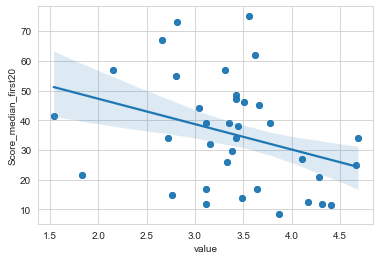

In [86]:
sns.regplot(data=dfmetrics[(dfmetrics.region == '7Networks_LH_Default_PFC_19') &
    (dfmetrics.epoch_ == 'early') & (dfmetrics.measure == 'eccentricity')],
            x='value', y='Score_median_first20')

In [87]:
dfpr[dfpr.p_Score_median_last20 < 0.05].reset_index()

,epoch_,measure,region,r_Score_median_first20,p_Score_median_first20,r_Score_median_last20,p_Score_median_last20,r_Score_mean_first20,p_Score_mean_first20,r_Score_mean_last20,...,r_Score_std_first20,p_Score_std_first20,r_Score_std_last20,p_Score_std_last20,r_Score_std_baseline,p_Score_std_baseline,r_Score_median_diff20,p_Score_median_diff20,r_Score_mean_diff20,p_Score_mean_diff20
0,b2e,eccentricity,7Networks_LH_Default_PFC_20,-0.332815,0.047327,-0.367293,0.027549,-0.305901,0.069615,-0.337331,...,-0.135345,0.431256,0.143476,0.403825,0.128610,0.454737,0.024703,0.886281,-0.011475,0.947039
1,b2e,eccentricity,7Networks_LH_Default_PFC_9,-0.124290,0.470152,0.362674,0.029715,-0.150637,0.380516,0.361046,...,-0.163761,0.339905,-0.064106,0.710308,-0.282788,0.094691,0.403133,0.014773,0.434667,0.008070
2,b2e,eccentricity,7Networks_LH_Default_Temp_5,-0.205985,0.228099,0.390258,0.018619,-0.253303,0.136063,0.398152,...,-0.004159,0.980794,-0.346299,0.038549,0.028500,0.868945,0.501985,0.001812,0.556373,0.000426
3,b2e,eccentricity,7Networks_LH_DorsAttn_Post_2,-0.027869,0.871820,0.394337,0.017319,-0.034078,0.843585,0.408017,...,0.090103,0.601249,-0.071061,0.680459,0.275425,0.103982,0.337070,0.044398,0.370912,0.025944
4,b2e,eccentricity,7Networks_LH_Limbic_OFC_1,0.002048,0.990543,0.361333,0.030370,0.005782,0.973303,0.353185,...,0.225180,0.186691,-0.130556,0.447885,0.063665,0.712217,0.282822,0.094650,0.289895,0.086340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,late,gradient4,7Networks_RH_Vis_10,-0.162286,0.344332,-0.430569,0.008758,-0.083124,0.629822,-0.371724,...,-0.084091,0.625832,-0.115197,0.503480,-0.324695,0.053343,-0.186130,0.277081,-0.237042,0.163926
1268,late,gradient4,7Networks_RH_Vis_19,-0.240258,0.158114,-0.361241,0.030415,-0.187615,0.273197,-0.318753,...,-0.174356,0.309138,0.054120,0.753908,-0.251996,0.138163,-0.057896,0.737327,-0.100472,0.559870
1269,late,gradient4,7Networks_RH_Vis_3,-0.119429,0.487824,-0.388117,0.019333,-0.014795,0.931752,-0.328753,...,0.079337,0.645553,-0.037842,0.826558,-0.035461,0.837320,-0.193130,0.259088,-0.261524,0.123385
1270,late,gradient4,7Networks_RH_Vis_48,-0.206953,0.225873,-0.329952,0.049383,-0.140530,0.413649,-0.300001,...,0.039432,0.819391,-0.053631,0.756062,0.195196,0.253928,-0.064675,0.707849,-0.126413,0.462545


In [88]:
from gradecc.utils.filenames import data_inside

# dfpr.to_csv(path.join(data_inside, 'behavioral_pr.csv'))

In [89]:
dfpr.xs(('baseline', 'gradient1'))

,r_Score_median_first20,p_Score_median_first20,r_Score_median_last20,p_Score_median_last20,r_Score_mean_first20,p_Score_mean_first20,r_Score_mean_last20,p_Score_mean_last20,r_Score_std_first20,p_Score_std_first20,r_Score_std_last20,p_Score_std_last20,r_Score_std_baseline,p_Score_std_baseline,r_Score_median_diff20,p_Score_median_diff20,r_Score_mean_diff20,p_Score_mean_diff20
region,,,,,,,,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,0.196013,0.251907,0.061119,0.723262,0.203119,0.234778,0.071421,0.678925,0.184048,0.282586,-0.162304,0.344278,-0.066075,0.701811,-0.136857,0.426079,-0.119815,0.486409
7Networks_LH_Cont_Cing_2,0.270305,0.110839,-0.175858,0.304923,0.251652,0.138721,-0.202776,0.235588,-0.004567,0.978909,0.027044,0.875588,-0.164638,0.337291,-0.393738,0.017505,-0.391723,0.018143
7Networks_LH_Cont_Cing_3,0.341834,0.041296,-0.346670,0.038327,0.331224,0.048461,-0.372546,0.025246,0.147338,0.391157,0.109459,0.525110,-0.076409,0.657821,-0.595867,0.000126,-0.603833,0.000097
7Networks_LH_Cont_Cing_4,-0.235370,0.167007,0.032189,0.852157,-0.193086,0.259199,0.046271,0.788723,0.174279,0.309355,-0.094309,0.584306,0.074864,0.664332,0.247540,0.145506,0.209253,0.220642
7Networks_LH_Cont_Cing_5,-0.051764,0.764311,-0.118556,0.491034,-0.052675,0.760283,-0.140647,0.413255,0.073546,0.669902,-0.108691,0.528037,-0.219093,0.199202,-0.044568,0.796331,-0.070935,0.680992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vermis VI,-0.307437,0.068155,-0.285438,0.091508,-0.363713,0.029216,-0.281821,0.095874,-0.188888,0.269897,0.005934,0.972600,-0.069689,0.686307,0.065255,0.705344,0.085971,0.618100
Vermis VIIIa,0.131934,0.443063,-0.126102,0.463656,0.134464,0.434290,-0.100751,0.558775,-0.004254,0.980355,-0.114348,0.506654,-0.063888,0.711251,-0.223914,0.189247,-0.202962,0.235149
Vermis VIIIb,0.099572,0.563408,-0.156619,0.361665,0.109421,0.525252,-0.151731,0.377027,0.110830,0.519900,0.091563,0.595344,0.203311,0.234328,-0.217416,0.202750,-0.223417,0.190256


In [90]:
# todo make function to match by index

In [91]:
dfpr.xs(('baseline', 'eccentricity'))[['r_Score_std_baseline', 'p_Score_std_baseline']]

,r_Score_std_baseline,p_Score_std_baseline
region,,
7Networks_LH_Cont_Cing_1,0.009234,0.938633
7Networks_LH_Cont_Cing_2,0.297177,0.011243
7Networks_LH_Cont_Cing_3,-0.021116,0.860248
7Networks_LH_Cont_Cing_4,-0.127587,0.285504
7Networks_LH_Cont_Cing_5,0.073462,0.539702
...,...,...
Vermis VI,0.246925,0.036523
Vermis VIIIa,0.234170,0.047721
Vermis VIIIb,-0.040870,0.733205


In [92]:
(dfpr.xs(('baseline', 'eccentricity')).p_Score_std_baseline < 0.05).sum()

172

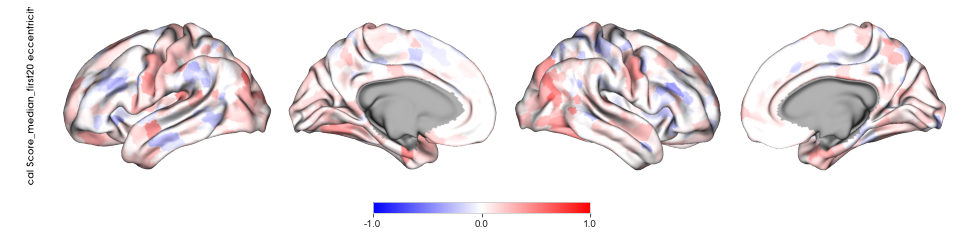

In [93]:
from gradecc.plot import plot_subc, plot_cortex

def _plot_behav_corr(metric,
                     epochs_=['baseline', 'early', 'late'],
                     measures=['eccentricity', 'gradient1', 'gradient2', 'gradient3', 'gradient4']):

    color_range = (-1, 1)
    for grad in measures:
        for epoch in epochs_:
            data = dfpr.xs((epoch, grad)).reset_index()

            text = metric + ' ' + grad + ' ' + epoch.upper()

            plot_cortex(data, value=('r_' + metric),
                        # mask=('p_' + metric),
                        color_map='bwr', color_range=color_range,
                        text=('cortical ' + text),
                        save_figure=True
                        )

            plot_subc(data, value=('r_' + metric),
            color_map='bwr', color_range=color_range,
                      text=('subcortical ' + text),
                      )


_plot_behav_corr(metric='Score_median_first20',
    epochs_=['e2l'], measures=['eccentricity'])

In [94]:
# for m in ['Score_median_first20', 'Score_median_last20', 'Score_median_diff20', 'Score_std_baseline']:
#     _plot_behav_corr(metric=m, measures=['eccentricity'],
#         epochs_=['baseline', 'early', 'late', 'b2e', 'e2l'])

In [95]:
# apply FDR

In [96]:
# early ecc significant in subc
[
'Vermis VIIb',
'Vermis VIIIa',
'Right VIIIa',
'Right Hippocampus',
'Left Pallidum',
]

['Vermis VIIb',
 'Vermis VIIIa',
 'Right VIIIa',
 'Right Hippocampus',
 'Left Pallidum']

In [97]:
# correlation between scores

In [98]:
dfmetrics

,region,dicom_dir,measure,epoch_,value,Subject,Score_median_first20,Score_median_last20,Score_mean_first20,Score_mean_last20,Score_std_first20,Score_std_last20,Score_std_baseline,Score_median_diff20,Score_mean_diff20
0,7Networks_LH_Vis_1,AB1,gradient1,baseline,0.515067,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
1,7Networks_LH_Vis_2,AB1,gradient1,baseline,0.829542,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
2,7Networks_LH_Vis_3,AB1,gradient1,baseline,0.537888,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
3,7Networks_LH_Vis_4,AB1,gradient1,baseline,-0.432275,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
4,7Networks_LH_Vis_5,AB1,gradient1,baseline,0.644839,AB1,14.0,49.5,17.000000,50.600000,12.057554,12.162929,13.991196,35.5,33.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748795,Vermis VI,ZN1,eccentricity,e2l,0.517294,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748796,Vermis VIIIa,ZN1,eccentricity,e2l,0.127787,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748797,Vermis VIIIb,ZN1,eccentricity,e2l,-0.247816,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442
748798,Vermis VIIb,ZN1,eccentricity,e2l,0.123111,ZN1,55.0,62.0,47.727273,54.285714,22.556999,18.061555,22.371034,7.0,6.558442


In [99]:
cross_list = []
for metric in ['Score_median_first20', 'Score_median_last20', 'Score_median_diff20', ]:
    dfcross = dfmetrics[(dfmetrics.measure == 'eccentricity') &
                        (dfmetrics.epoch_ == 'baseline')]\
        .groupby('region').apply(corr, 'Score_std_baseline', metric)
    cross_list.append(_expand_p_r(dfcross, metric))

In [100]:
dfcross = pd.concat(cross_list, axis=1, join="outer", ignore_index=False,)
dfcross

,r_Score_median_first20,p_Score_median_first20,r_Score_median_last20,p_Score_median_last20,r_Score_median_diff20,p_Score_median_diff20
region,,,,,,
7Networks_LH_Cont_Cing_1,-0.205706,0.083004,-0.104328,0.383132,0.111955,0.349122
7Networks_LH_Cont_Cing_2,-0.205706,0.083004,-0.104328,0.383132,0.111955,0.349122
7Networks_LH_Cont_Cing_3,-0.205706,0.083004,-0.104328,0.383132,0.111955,0.349122
7Networks_LH_Cont_Cing_4,-0.205706,0.083004,-0.104328,0.383132,0.111955,0.349122
7Networks_LH_Cont_Cing_5,-0.205706,0.083004,-0.104328,0.383132,0.111955,0.349122
...,...,...,...,...,...,...
Vermis VI,-0.205706,0.083004,-0.104328,0.383132,0.111955,0.349122
Vermis VIIIa,-0.205706,0.083004,-0.104328,0.383132,0.111955,0.349122
Vermis VIIIb,-0.205706,0.083004,-0.104328,0.383132,0.111955,0.349122


In [101]:
dfcross.iloc[0]

r_Score_median_first20   -0.205706
p_Score_median_first20    0.083004
r_Score_median_last20    -0.104328
p_Score_median_last20     0.383132
r_Score_median_diff20     0.111955
p_Score_median_diff20     0.349122
Name: 7Networks_LH_Cont_Cing_1, dtype: float64

In [102]:
# correlation between Score_std_baseline with learning Scores
#
# r_Score_median_first20: -0.205706
# p_Score_median_first20: 0.083004
# r_Score_median_last20: -0.104328
# p_Score_median_last20: 0.383132
# r_Score_median_diff20: 0.111955
# p_Score_median_diff20: 0.349122